In [1]:
pip install afinn

     |████████████████████████████████| 61kB 885kB/s eta 0:00:01
  Created wheel for afinn: filename=afinn-0.1-cp37-none-any.whl size=53452 sha256=1edbbd0a76f0af9fcbe840241bcc92f574a387755e9cdc6ababd66602c169e35
  Stored in directory: /home/thekop/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

pos_review = (glob.glob("./train/pos/*.txt"))[20]

f = open(pos_review, 'r')
lines1 = f.readlines()[0]
f.close()

afinn = Afinn()
afinn.score(lines1)

25.0

In [24]:
neg_review=(glob.glob("./train/neg/*.txt"))[20]
f = open(neg_review, 'r')
lines2 = f.readlines()[0]
f.close()
afinn.score(lines2)

-11.0

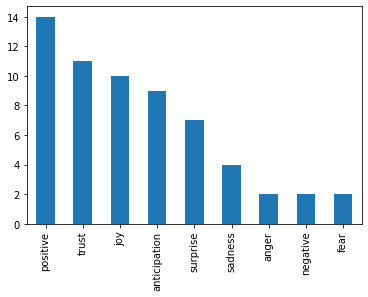

In [14]:
NRC = pd.read_csv('./NRC.txt',engine="python",header=None,sep="\t")

NRC=NRC[(NRC != 0).all(1)]
NRC=NRC.reset_index(drop=True)

tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()
raw = lines1.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]
match_words = [x for x in stopped_tokens if x in list(NRC[0])]

emotion=[]
for i in match_words:
    temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
    for j in temp:
        emotion.append(j)

sentiment_result1=pd.Series(emotion).value_counts()
sentiment_result1
sentiment_result1.plot.bar()

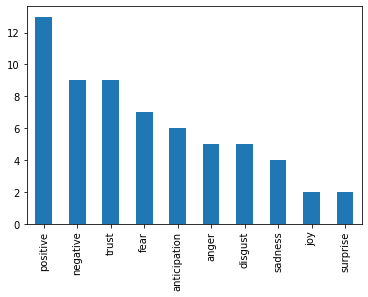

In [15]:
raw = lines2.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]
match_words = [x for x in stopped_tokens if x in list(NRC[0])]

emotion=[]
for i in match_words:
    temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
    for j in temp:
        emotion.append(j)

sentiment_result2=pd.Series(emotion).value_counts()
sentiment_result2
sentiment_result2.plot.bar()

In [25]:
# 기계학습으로 감성분석
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

pos_review=(glob.glob("./test/pos/*.txt"))

# 긍정,부정 텍스트 읽어오기
lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue
len(lines_pos)

12500

In [26]:
neg_review=(glob.glob("./test/neg/*.txt"))

lines_neg=[]
for i in neg_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()
    except Exception as e:
        continue

len(lines_neg)

12500

In [27]:
total_text=lines_pos+lines_neg
len(total_text)

25000

In [28]:
x = np.array(["pos", "neg"])
class_Index=np.repeat(x, [len(lines_pos), len(lines_neg)], axis=0)
stop_words = stopwords.words('english')
vect = TfidfVectorizer(stop_words=stop_words).fit(total_text)
X_train_vectorized = vect.transform(total_text)
X_train_vectorized.index = class_Index

from sklearn.linear_model import LogisticRegression,SGDClassifier
model = LogisticRegression()
model.fit(X_train_vectorized, class_Index)
pos_review_test=(glob.glob("./test/pos/*.txt"))[10]

test=[]
f = open(pos_review_test, 'r')
test.append(f.readlines()[0])
f.close()

predictions = model.predict(vect.transform(test))
predictions

/home/thekop/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array(['pos'], dtype='<U3')

In [29]:
neg_review_test=(glob.glob("./test/neg/*.txt"))[20]

test2=[]
f = open(neg_review_test, 'r')
test2.append(f.readlines()[0])
f.close()

predictions = model.predict(vect.transform(test2))
predictions

array(['neg'], dtype='<U3')

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_vectorized, class_Index)

predictions = clf.predict(vect.transform(test))
predictions

array(['pos'], dtype='<U3')

In [31]:
predictions = clf.predict(vect.transform(test2))
predictions

array(['neg'], dtype='<U3')

In [32]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_vectorized, class_Index) 
predictions = clf.predict(vect.transform(test))
predictions

/home/thekop/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array(['pos'], dtype='<U3')

In [33]:
predictions = clf.predict(vect.transform(test2))
predictions

array(['pos'], dtype='<U3')